In [1]:
import numpy as np
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42;
matplotlib.rcParams['ps.fonttype'] = 42
import matplotlib.pyplot as plt
import pandas as pd
import os
from matplotlib.lines import Line2D

In [2]:
def comp_time(idx):
    t = df['cpu_t'][idx]
    tt = t.split(sep=',')
    n = len(tt)
    t_samp = np.zeros(n//2)
    t_proc = np.zeros(n//2)
    for i in range(n//2):
        t_samp[i] = float(tt[2*i][2:])
        if i==n//2 - 1:
            t_proc[i] = float(tt[2*i+1][:-2])
        else: t_proc[i] = float(tt[2*i+1][:-1])
    t_tot = t_samp + t_proc
    return t_tot.mean()

In [3]:
df = pd.read_csv('./satellite/2020-07-24-14-23-35.csv')
df['mean_time'] = [comp_time(i) for i in range(len(df['cpu_t']))]
df.head()

,Unnamed: 0,x_0,r_ctrl,method,p_spl,rho_up,n_itr,rho,vol,cpu_t,mean_time
0,0,[0. 0. 0. 0. 0. 0.],[[10. 0. 0.]\n [ 0. 10. 0.]\n [ 0. 0. 10.]],robust,10,0.1,1,0.100000,6.181463e-07,"[[0.001176646999999864, 0.007897033000000109]]",0.009074
1,0,[0. 0. 0. 0. 0. 0.],[[10. 0. 0.]\n [ 0. 10. 0.]\n [ 0. 0. 10.]],robust,56,0.1,1,0.100000,6.181463e-07,"[[0.0067034560000001076, 0.006460664000000005]]",0.013164
2,0,[0. 0. 0. 0. 0. 0.],[[10. 0. 0.]\n [ 0. 10. 0.]\n [ 0. 0. 10.]],robust,316,0.1,11,0.059874,1.326782e-07,"[[0.03037672300000005, 0.005558713999999965], ...",0.034794
3,0,[0. 0. 0. 0. 0. 0.],[[10. 0. 0.]\n [ 0. 10. 0.]\n [ 0. 0. 10.]],robust,1778,0.1,16,0.046329,6.146862e-08,"[[0.1704571399999999, 0.005847052000000019], [...",0.170172
4,0,[0. 0. 0. 0. 0. 0.],[[10. 0. 0.]\n [ 0. 10. 0.]\n [ 0. 0. 10.]],robust,10000,0.1,17,0.044013,5.270166e-08,"[[1.0603491409999997, 0.20299900100000023], [0...",1.126949


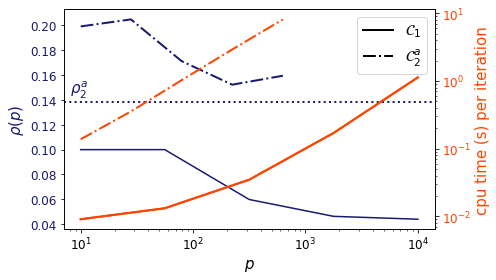

In [4]:
fig, ax1 = plt.subplots(figsize=(7, 4))

color = 'midnightblue'
ax1.set_xlabel(r'$p$', size=15)
ax1.set_ylabel(r'$\rho(p)$', color=color, size=15)
ax1.tick_params(axis='y', labelcolor=color, labelsize=12)
ax1.tick_params(axis='x', labelsize=12)
ax1.set_xscale('log')

x = df[df['method'] == 'robust']['p_spl']
y = df[df['method'] == 'robust']['rho']
ax1.plot(x, y, color=color)

x = df[df['method'] == 'CS']['p_spl'][1:]
y = df[df['method'] == 'CS']['rho'][1:]
ax1.plot(x, y, color=color, label=r'$\rho_{CS}(p)$', linestyle='-.', lw=2)
ax1.axhline(df['rho'][5], color=color, label=r'$\rho_{CS}$', linestyle='dotted', lw=2)
plt.annotate(r'$\rho_2^a$', (8, 0.145), color=color, size=15)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
color = 'orangered'
ax2.set_ylabel(r'cpu time (s) per iteration', color=color, size=15)  # we already handled the x-label with ax1
ax2.set_yscale('log')
#ax2.set_ylim(1e-3, 1)

x = df[df['method'] == 'robust']['p_spl']
y = df[df['method'] == 'robust']['mean_time']
ax2.plot(x, y, color=color, lw=2)
ax2.tick_params(axis='y', labelcolor=color, labelsize=12)
ax2.plot(x, y, color=color, label=r'$t_1(p)$', lw=2)

x = df[df['method'] == 'CS']['p_spl'][1:]
y = df[df['method'] == 'CS']['mean_time'][1:]
ax2.plot(x, y, color=color, linestyle='-.', lw=2)

fig.tight_layout()
custom_lines = [Line2D([0], [0], color='black', linestyle='-', lw=2),
                Line2D([0], [0], color='black', linestyle='-.', lw=2)]

plt.legend(custom_lines, [r'$\mathcal{C}_1$', r'$\mathcal{C}_2^a$'], prop={"size":15})

plt.savefig('./plots/satellite.pdf')
plt.show()